In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

in_f = 10000



data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_'+str(i)+'.txt')
    data_ST_list.append(cc)


data_ST_list = np.array(data_ST_list)
data_ST = np.resize(data_ST_list,(5000,2500))

data_ST_ = []
for i in range(data_ST.shape[0]):
    data_ST_.append(data_ST[i][0:in_f])

data_ST_ = np.array(data_ST_)


del data_ST, data_ST_list





data_SB_list = []
for i in range(10):
    cc = np.loadtxt('disease_SB_svd_'+str(i)+'.txt')
    data_SB_list.append(cc)


data_SB_list = np.array(data_SB_list)
data_SB = np.resize(data_SB_list,(5000,2500))

data_SB_ = []
for i in range(data_SB.shape[0]):
    data_SB_.append(data_SB[i][0:in_f])

data_SB_ = np.array(data_SB_)


del data_SB, data_SB_list




data_SR_list = []
for i in range(10):
    cc = np.loadtxt('disease_SR_svd_'+str(i)+'.txt')
    data_SR_list.append(cc)


data_SR_list = np.array(data_SR_list)
data_SR = np.resize(data_SR_list,(5000,2500))

data_SR_ = []
for i in range(data_SR.shape[0]):
    data_SR_.append(data_SR[i][0:in_f])

data_SR_ = np.array(data_SR_)


del data_SR, data_SR_list



data_ST_train = []
data_SR_train = []
data_SB_train = []

for i in range(2500):
    data_SB_train.append(data_SB_[i])
    data_SR_train.append(data_SR_[i])
    data_ST_train.append(data_ST_[i])



data_ST_test = []
data_SR_test = []
data_SB_test = []

for i in range(3000,4000):
    data_SB_test.append(data_SB_[i])
    data_SR_test.append(data_SR_[i])
    data_ST_test.append(data_ST_[i])


data_train = data_SB_train + data_SR_train + data_ST_train
data_test = data_SB_test + data_SR_test + data_ST_test


del data_SB_train, data_SR_train, data_ST_train
del data_SB_test, data_SR_test, data_ST_test



label_train = []
for i in range(2500):
    label_train.append(0)

for i in range(2500):
    label_train.append(1)

for i in range(2500):
    label_train.append(2)

label_train = np.array(label_train)

label_test = []
for i in range(1000):
    label_test.append(0)

for i in range(1000):
    label_test.append(1)

for i in range(1000):
    label_test.append(2)

label_test = np.array(label_test)





In [2]:
data_train = torch.FloatTensor(data_train)
label_train = torch.LongTensor(label_train)

data_test = torch.FloatTensor(data_test)
label_test = torch.LongTensor(label_test)

/tmp/ipykernel_62127/1733711697.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  data_train = torch.FloatTensor(data_train)


In [3]:
class Model(nn.Module):
  def __init__(self, in_features= 2500 , h1= 250  , h2= 50 ,
                h3 = 20 , h4 = 10, h5 = 5,
                    out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.fc4 = nn.Linear(h3, h4)
    self.fc5 = nn.Linear(h4, h5)


    self.out = nn.Linear(h5, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))


    x = self.out(x)

    return x


torch.manual_seed(42)
model = Model()


In [4]:


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
# epochs = 100
losses = []
validation_losses = []
for i in range(epochs):
  
  y_pred = model.forward(data_train) 

  loss = criterion(y_pred, label_train) 

  # Evaluate Model on Test Data Set (validate model on test set)
  with torch.no_grad():  # Basically turn off back propogation
    y_eval = model.forward(data_test) # X_test are features from our test set, y_eval will be predictions
    validation_loss = criterion(y_eval, label_test) # Find the loss or error
    validation_losses.append(validation_loss.detach().numpy().item())



  losses.append(loss.detach().numpy().item())

  if i % 100 == 0:
    print(f'Epoch: {i} and loss: {loss} validation loss : {validation_loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





/home/karansingh/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/karansingh/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:749: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count


Epoch: 0 and loss: 1.1731597185134888 validation loss : 1.1731598377227783
Epoch: 100 and loss: 1.0420011281967163 validation loss : 1.079508662223816
Epoch: 200 and loss: 0.7633444666862488 validation loss : 0.8194573521614075
Epoch: 300 and loss: 0.42241019010543823 validation loss : 0.8592251539230347
Epoch: 400 and loss: 0.3362925052642822 validation loss : 0.8735793232917786
Epoch: 500 and loss: 0.1527586281299591 validation loss : 1.6915260553359985
Epoch: 600 and loss: 0.09977315366268158 validation loss : 2.5903985500335693
Epoch: 700 and loss: 0.08402997255325317 validation loss : 3.283909797668457
Epoch: 800 and loss: 1.0197279453277588 validation loss : 1.0130529403686523
Epoch: 900 and loss: 0.4034371078014374 validation loss : 0.9233108758926392


In [5]:
losses = np.array(losses)
np.savetxt('loss_model_.txt', losses)

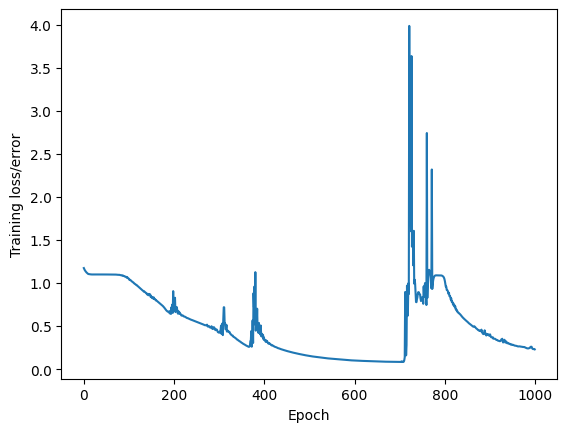

In [6]:
plt.plot(range(epochs), losses)
plt.ylabel("Training loss/error")
plt.xlabel('Epoch')
plt.savefig('training_loss.png')

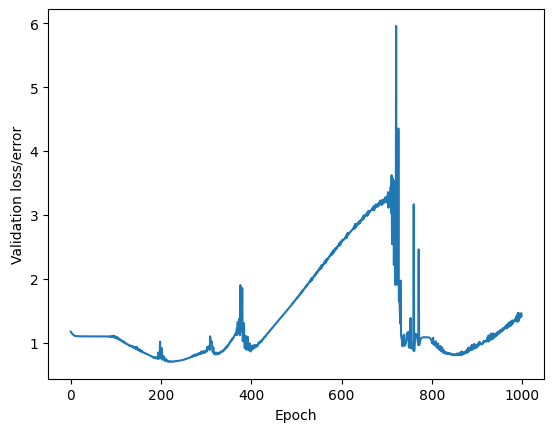

In [7]:
plt.plot(range(epochs), validation_losses)
plt.ylabel("Validation loss/error")
plt.xlabel('Epoch')



plt.savefig('validation_loss.png')


